In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

In [2]:
my_data_dir =r"D:\PGCP-DSML RITHEESH V\Neural Network & Deep Learning\chest_xray_images\chest_xray"
train_path = my_data_dir + '/train/'
test_path = my_data_dir + '/test/'

image_shape=(28,28,1)
batch_size=64

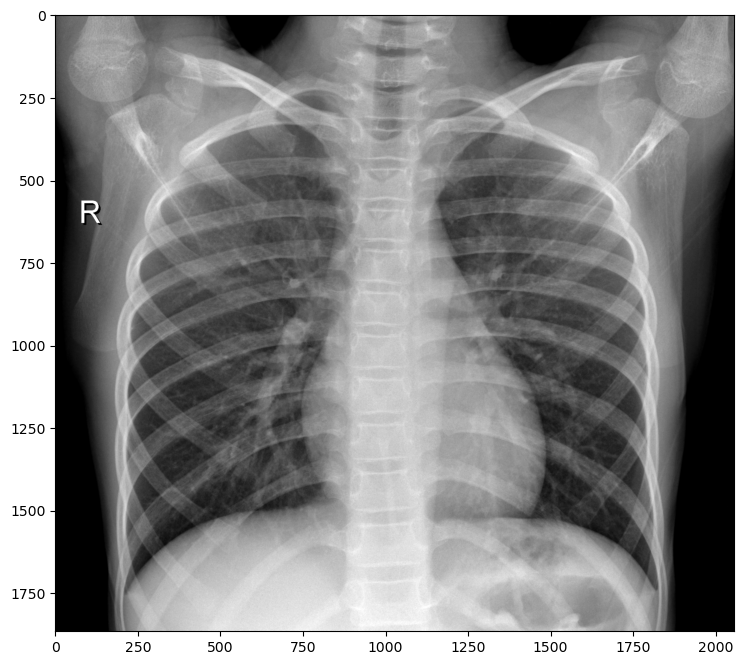

In [3]:
img = plt.imread(my_data_dir+r"\train\NORMAL\NORMAL2-IM-1334-0001.jpeg")
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

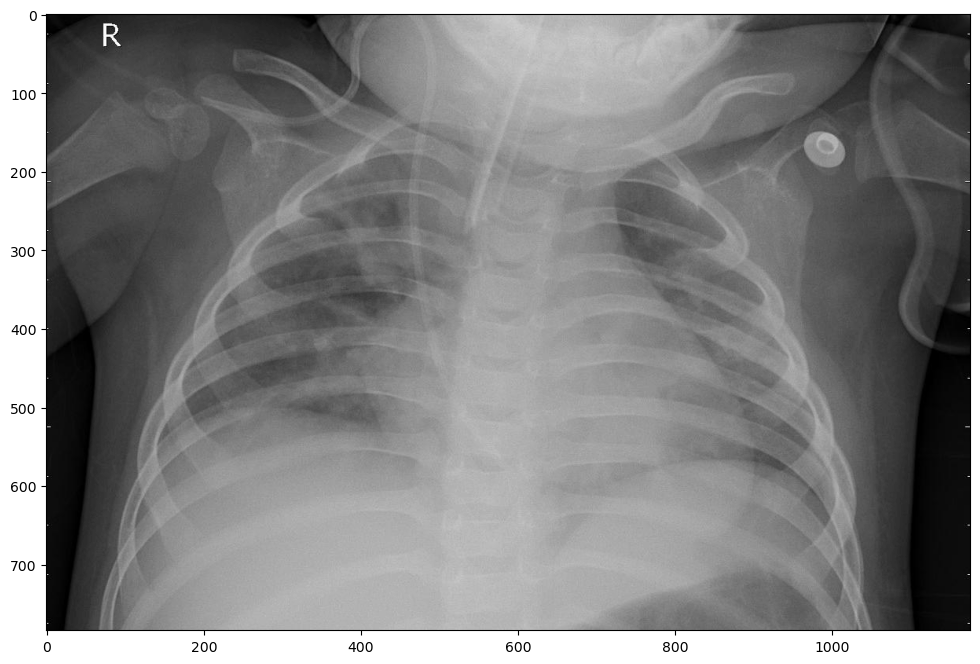

In [8]:
img = plt.imread(my_data_dir+r"\train\PNEUMONIA\person9_bacteria_41.jpeg")
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

In [9]:
img.shape[:2]

(784, 1176)

In [10]:
target_size=image_shape[:2]
target_size

(28, 28)

In [11]:
image_gen = ImageDataGenerator(rescale=1/255.)

In [12]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
train_set[0][0].shape

(64, 28, 28, 1)

In [14]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [15]:
test_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [16]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape,strides=(1, 1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape,activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape,padding='SAME',activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(312))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
results = model.fit(train_set,epochs=10,
                              validation_data=test_set,
                              callbacks=[early_stop]
                             )

Epoch 1/10
82/82 [==============================] - 104s 1s/step - loss: 0.5660 - accuracy: 0.7423 - val_loss: 0.5578 - val_accuracy: 0.6346
Epoch 2/10
82/82 [==============================] - 25s 304ms/step - loss: 0.3351 - accuracy: 0.8497 - val_loss: 0.3880 - val_accuracy: 0.8253
Epoch 3/10
82/82 [==============================] - 25s 303ms/step - loss: 0.2248 - accuracy: 0.9074 - val_loss: 0.4064 - val_accuracy: 0.8269
Epoch 4/10
82/82 [==============================] - 25s 305ms/step - loss: 0.1646 - accuracy: 0.9331 - val_loss: 0.5069 - val_accuracy: 0.7917
Epoch 5/10
82/82 [==============================] - 25s 302ms/step - loss: 0.1463 - accuracy: 0.9433 - val_loss: 0.6308 - val_accuracy: 0.7548
Epoch 6/10
82/82 [==============================] - 25s 302ms/step - loss: 0.1180 - accuracy: 0.9586 - val_loss: 0.5694 - val_accuracy: 0.7804
Epoch 7/10
82/82 [==============================] - 25s 301ms/step - loss: 0.1190 - accuracy: 0.9559 - val_loss: 0.8306 - val_accuracy: 0.7292


In [19]:
pd.DataFrame(results.history)

,loss,accuracy,val_loss,val_accuracy
0,0.566007,0.742331,0.557808,0.634615
1,0.335108,0.849693,0.388025,0.825321
2,0.224801,0.907400,0.406391,0.826923
3,0.164642,0.933091,0.506936,0.791667
4,0.146310,0.943252,0.630825,0.754808
5,0.117960,0.958589,0.569371,0.780449
6,0.119031,0.955905,0.830577,0.729167


In [20]:
def plot_history(results):
    hist = pd.DataFrame(results.history)
    hist['epoch'] = results.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Validation Accuracy')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')

    plt.legend()
    plt.show()


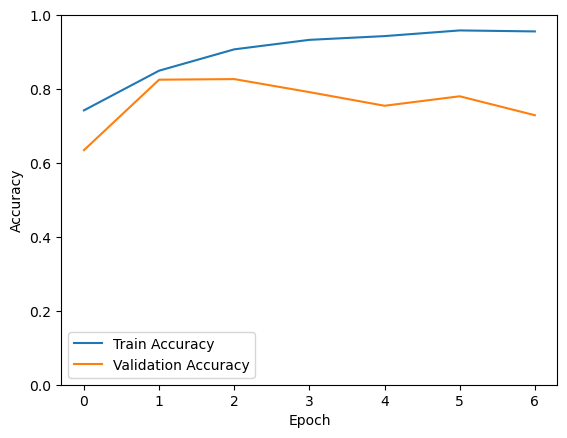

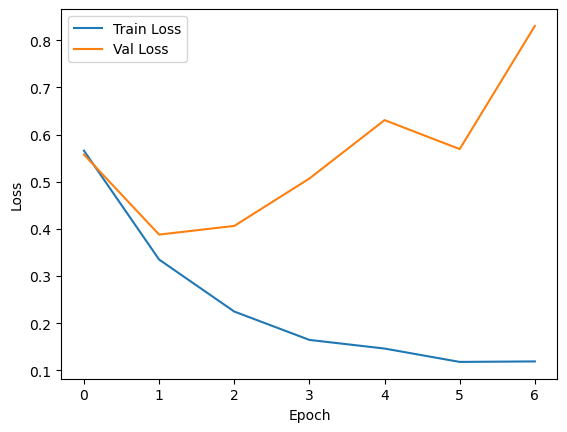

In [21]:
plot_history(results)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [23]:
pred_probability = model.predict_generator(test_set)

In [24]:
pred_probability

array([[0.8971118 ],
       [0.82642114],
       [0.9432578 ],
       [0.97875106],
       [0.43234164],
       [0.21832944],
       [0.6454516 ],
       [0.75076026],
       [0.76490843],
       [0.45521086],
       [0.7947109 ],
       [0.9613744 ],
       [0.69169194],
       [0.4044426 ],
       [0.9541188 ],
       [0.54788446],
       [0.9941093 ],
       [0.7884404 ],
       [0.02263304],
       [0.6493475 ],
       [0.96870124],
       [0.639618  ],
       [0.2908248 ],
       [0.6835803 ],
       [0.86205554],
       [0.645715  ],
       [0.92473763],
       [0.7220642 ],
       [0.8031987 ],
       [0.40439796],
       [0.61099535],
       [0.9317486 ],
       [0.74932283],
       [0.6116231 ],
       [0.9512722 ],
       [0.5585396 ],
       [0.00537934],
       [0.91290486],
       [0.22835688],
       [0.20092237],
       [0.98042214],
       [0.28766668],
       [0.15209602],
       [0.02781318],
       [0.9978449 ],
       [0.88120043],
       [0.9906438 ],
       [0.947

In [25]:
test_loss,test_acc = model.evaluate(test_set)
print('Test accuracy', test_acc)

10/10 [==============================] - 2s 199ms/step - loss: 0.8306 - accuracy: 0.7292
Test accuracy 0.7291666865348816


In [26]:
['NORMAL' if i<0.5 else 'PNEUMONIA' for i in pred_probability]

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NOR

In [29]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))


    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(2))
    

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    return model

In [30]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [31]:
tuner = kt.GridSearch(model_builder,
                     objective='val_loss',
                     overwrite=True,
                     directory='my_dir',
                     project_name='mask_cl')

In [32]:
tuner.search(train_im, train_la,epochs=10,validation_split=0.2,callbacks=[stop_early])

Trial 48 Complete [00h 00m 04s]
val_loss: 0.6940509080886841

Best val_loss So Far: 0.6819246411323547
Total elapsed time: 00h 01m 55s
INFO:tensorflow:Oracle triggered exit


In [33]:
best_hps_list=tuner.get_best_hyperparameters(num_trials=2)
len(list(best_hps_list))

2

In [34]:
best_hps = tuner.get_best_hyperparameters(num_trials=2)[0] # Combining above two steps and directly getting best hyperparameter

In [35]:
best_hps.get('units')

64

In [36]:
best_hps.get('learning_rate')

0.001

In [37]:
print(f"""
The hyperparameter search is complete.
The optimal number of units in the first hidden layer is {best_hps.get('units')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete.
The optimal number of units in the first hidden layer is 64.
The optimal learning rate for the optimizer is 0.001.



In [38]:
best_model = tuner.get_best_models()[0]

In [40]:
best_model.evaluate(test_im,test_la)

437/437 [==============================] - 0s 603us/step - loss: 0.7071 - accuracy: 0.6810


[0.7071037292480469, 0.6809925436973572]

In [41]:
predections = best_model.predict(test_im)

437/437 [==============================] - 0s 516us/step


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 665,602
Trainable params: 665,602
Non-trainable params: 0
_________________________________________________________________


In [44]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 50,370
Trainable params: 50,370
Non-trainable params: 0
_________________________________________________________________
